<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/M7_CS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Loading dependancy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline
# to make this notebook's output stable across runs
np.random.seed(42)

### Get the data

In [2]:
voice = pd.read_csv(r"/content/voice.csv")
print(voice.label.value_counts())
voice.columns
      

female    1584
male      1584
Name: label, dtype: int64


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(voice.label)

LabelEncoder()

In [4]:
print(le.classes_)
voice['label_t'] = le.transform(voice['label'])

['female' 'male']


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(voice, voice["label_t"]):
    strat_train_set = voice.loc[train_index]
    strat_test_set = voice.loc[test_index]
voice_train = strat_train_set.copy()
voice_test = strat_test_set.copy()

train_X = voice_train.iloc[:, 0:-2]
train_y = voice_train.iloc[:, -1:].values.ravel()
test_X = voice_test.iloc[:, 0:-2]
test_y = voice_test.iloc[:, -1:].values.ravel()

In [6]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [7]:
print("Cross Validation score on training set: ")
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(logistic, train_X,train_y, cv=3, scoring="accuracy")
print(f"Validity score on Training set {cvs}")

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logistic, train_X,train_y, cv=3)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_y, y_train_pred)
#print(f"Confusion Score: \n{cm_train}")

from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision Score: {precision_score(train_y, y_train_pred)}\nRecall Score: {recall_score(train_y, y_train_pred)}\
      \nF1 Score: {f1_score(train_y, y_train_pred)}")

y_scores = cross_val_predict(logistic, train_X,train_y, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_y, y_scores)

Cross Validation score on training set: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Validity score on Training set [0.88757396 0.89940828 0.88270142]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Precision Score: 0.847887323943662
Recall Score: 0.9502762430939227      
F1 Score: 0.8961667286937104


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(-2.0, 2.0)

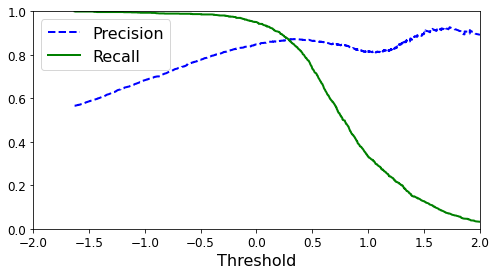

In [8]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2, 2])

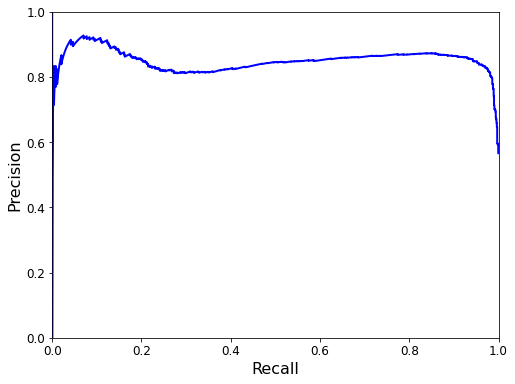

In [9]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

In [10]:
logistic.fit(train_X,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy on Test Set

In [11]:
y_test_pred = logistic.predict(test_X)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(test_y, y_test_pred)
print(f"Confusion Score for test set: \n{cm_test}")

print(f"Confusion Score for training set: \n{cm_train}")
from sklearn.metrics import precision_score, recall_score, f1_score
print("Score of test set")
print(f"Precision Score: {precision_score(test_y, y_test_pred)}\nRecall Score: {recall_score(test_y, y_test_pred)}\
      \nF1 Score: {f1_score(test_y, y_test_pred)}")
print("Score of train set")
print(f"Precision Score: {precision_score(train_y, y_train_pred)}\nRecall Score: {recall_score(train_y, y_train_pred)}\
      \nF1 Score: {f1_score(train_y, y_train_pred)}")


Confusion Score for test set: 
[[268  49]
 [  6 311]]
Confusion Score for training set: 
[[1051  216]
 [  63 1204]]
Score of test set
Precision Score: 0.8638888888888889
Recall Score: 0.9810725552050473      
F1 Score: 0.9187592319054653
Score of train set
Precision Score: 0.847887323943662
Recall Score: 0.9502762430939227      
F1 Score: 0.8961667286937104


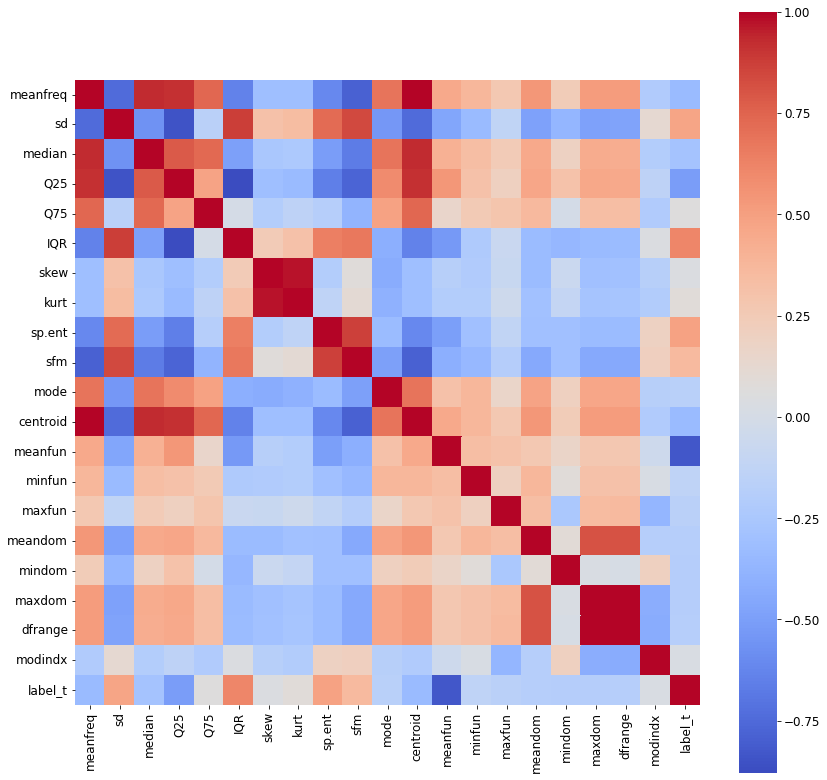

In [12]:
corr_matrix = strat_train_set.corr()
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

### IQR is positively correlated whereas meanfun is strongly negatively correlated. 

In [13]:
train_X = voice_train.iloc[:, [5,12]]
train_y = voice_train.iloc[:, -1:].values.ravel()
test_X = voice_test.iloc[:, [5,12]]
test_y = voice_test.iloc[:, -1:].values.ravel()

In [14]:
logistic.fit(train_X,train_y)
y_test_pred = logistic.predict(test_X)
confusion_matrix(test_y, y_test_pred)


array([[275,  42],
       [  5, 312]])

In [15]:
print(f"Precision Score: {precision_score(test_y, y_test_pred)}\nRecall Score: {recall_score(test_y, y_test_pred)}\
      \nF1 Score: {f1_score(test_y, y_test_pred)}")

Precision Score: 0.8813559322033898
Recall Score: 0.9842271293375394      
F1 Score: 0.9299552906110283
